# Análise exploratória de dados

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# 1 - Coleta de Dados



In [9]:
Fmri = pd.read_csv('../data/raw/Fmri.csv') #essa linha de código é a mesma coisa que Fmri = sns.load_dataset("Fmri")
Fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


# 2 - Descrição dos dados 

In [22]:
Dicionario = pd.read_csv('../data/external/dicionariofmri.csv')
Dicionario
                         

,variavel,descrição,tipo,subtipo
0,subject,individuos envolvidos,qualitativa,nominal
1,timepoint,momentos em que as imagens foram adquiridas,qualitativa,continua
2,event,tipos de eventos e experimentos,qualitativa,continua
3,region,regiao do cerebro em que foi realizada a ativi...,qualitativa,nominal
4,sinal,Intesidade do sinal,quantitativa,continua


In [23]:
print(Dicionario['tipo'].value_counts())
print(Dicionario['subtipo'].value_counts()) #Para filtar e contar as variáveis quantitativas e qualitativas 

qualitativa     4
quantitativa    1
Name: tipo, dtype: int64
continua    3
nominal     2
Name: subtipo, dtype: int64


In [24]:
print('Dados faltantes:')
print(Fmri.isna().sum())
print('\nFormato:')
print('Linhas: ', Fmri.shape[0], 'Colunas: ', Fmri.shape[1]) #Comando para saber a quantidade de linhas e colunhas do datashet 

Dados faltantes:
subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64

Formato:
Linhas:  1064 Colunas:  5


# Perguntas de partida e hipótese

# Qual região do cérebro o exame foi realizado mais vezes

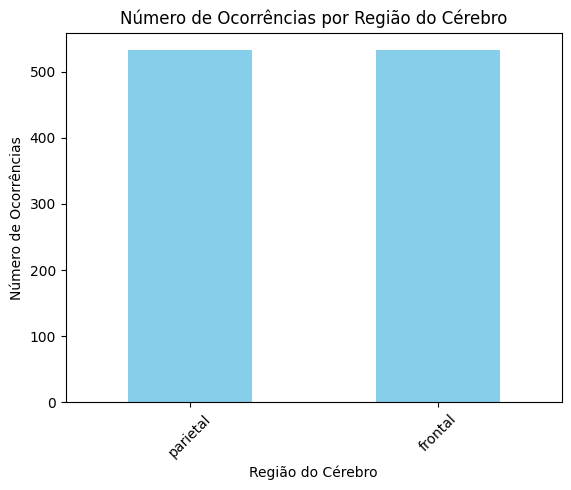

In [53]:
contagem_regioes = Fmri['region'].value_counts()

# Plotar o gráfico de barras
contagem_regioes.plot(kind='bar', color='skyblue')
plt.xlabel('Região do Cérebro')
plt.ylabel('Número de Ocorrências')
plt.title('Número de Ocorrências por Região do Cérebro')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.show()

# Quais os momentos que mais ocorrem os estímulos?

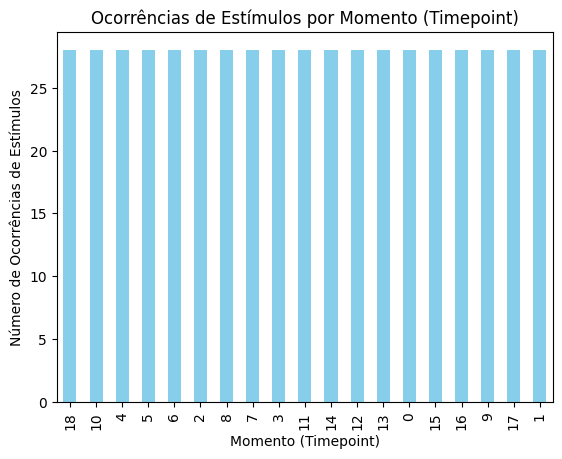

In [54]:
eventos_stim = Fmri[Fmri['event'] == 'stim']

contagem_momentos = eventos_stim['timepoint'].value_counts()

contagem_momentos.plot(kind='bar', color='skyblue')
plt.xlabel('Momento (Timepoint)')
plt.ylabel('Número de Ocorrências de Estímulos')
plt.title('Ocorrências de Estímulos por Momento (Timepoint)')
plt.show()

Momento médio em que ocorrem os estímulos:

In [55]:
eventos_stim = Fmri[Fmri['event'] == 'stim']

momento_medio_stim = eventos_stim['timepoint'].mean()

print("O momento médio em que ocorrem os estímulos é:", momento_medio_stim)

O momento médio em que ocorrem os estímulos é: 9.0


# Qual a variação do sinal ao longo do tempo?

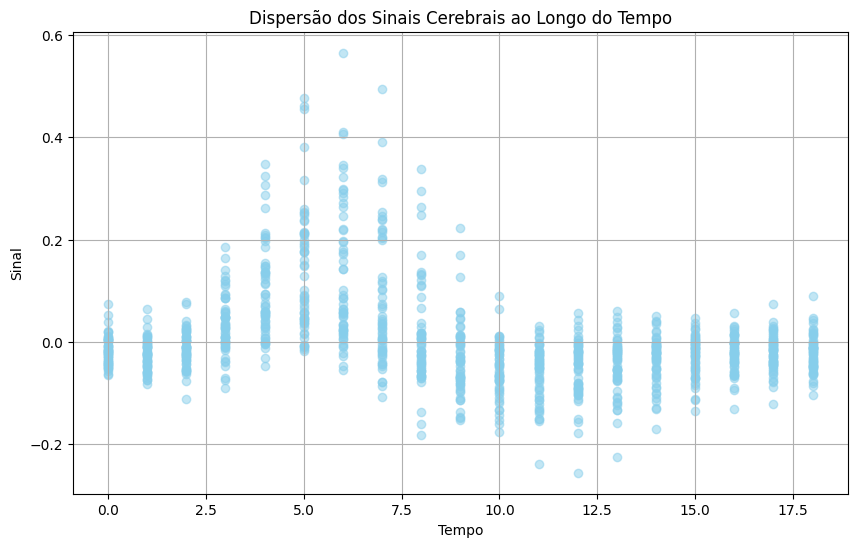

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(Fmri['timepoint'], Fmri['signal'], color='skyblue', alpha=0.5)
plt.grid(True)
plt.xlabel("Tempo")
plt.ylabel("Sinal")
plt.title("Dispersão dos Sinais Cerebrais ao Longo do Tempo")
plt.show()


Em qual faixa de valores os sinais são mais comuns?

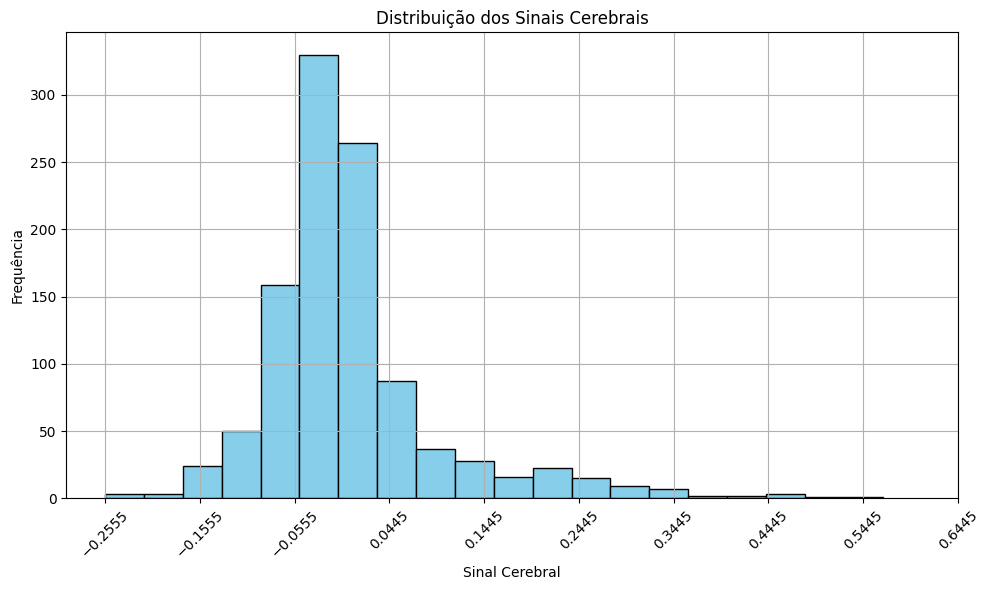

In [67]:

valores_ticks = np.arange(Fmri['signal'].min(), Fmri['signal'].max() + 0.1, 0.1)

plt.figure(figsize=(10, 6))
plt.hist(Fmri['signal'], bins=20, color='skyblue', edgecolor='black')
plt.grid(True)
plt.xlabel("Sinal Cerebral")
plt.ylabel("Frequência")
plt.title("Distribuição dos Sinais Cerebrais")
plt.xticks(valores_ticks, rotation=45)
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()


# Qual a comparação entre as variáveis do event?

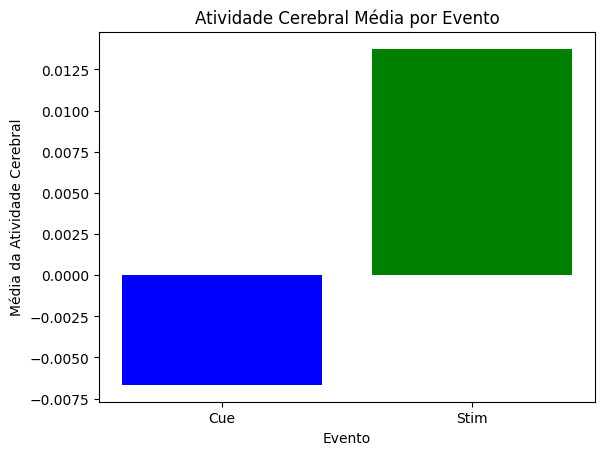

In [68]:
media_cue = Fmri[Fmri['event'] == 'cue']['signal'].mean()
media_stim = Fmri[Fmri['event'] == 'stim']['signal'].mean()

plt.bar(['Cue', 'Stim'], [media_cue, media_stim], color=['blue', 'green'])
plt.xlabel('Evento')
plt.ylabel('Média da Atividade Cerebral')
plt.title('Atividade Cerebral Média por Evento')
plt.show()

# 3 - Insights